# Project A

    In this projekt we will take a look at how to load stocks pricing data.

    Then we will compare the data and save it for late use.


### Import Modules

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.pylabtools import figsize
figsize(12.5, 5)


import matplotlib.pyplot as plt
import warnings
plt.style.use('dark_background')
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
from pandas.tseries.offsets import BDay
import yfinance as yf
from yahoofinancials import YahooFinancials

import sys
sys.path.insert(0, '../scripts/')

import numpy as np

import utilities as ut
from utilities import clean_ticker
from utilities import clean_tickers
from utilities import adjust

### Download and Adjust Pricing Data

In [57]:
# datetime values
# start = 20 years ago
# end = today
start = end - 252 * BDay() * 20
end = pd.datetime.today().date()

In [27]:
def download_and_adjust(sym):
    df = yf.download(sym, start=start, end=end, progress=False)
    df.index = pd.to_datetime(df.index)
    df['adj open'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['Open'], rounding=6)
    df['adj high'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['High'], rounding=6)
    df['adj low'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['Low'], rounding=6)
    ohlc = df[['adj open', 'adj high', 'adj low', 'Adj Close', 'Volume']]
    ohlc.columns = ['Open','High','Low','Close', 'Volume']
    return ohlc

### Stock 1 -  Take-Two Interactive Software

In [29]:
download_and_adjust("TTWO")

,Open,High,Low,Close,Volume
Date,,,,,
2001-10-15,6.826245,6.999568,6.666255,6.799580,543750
2001-10-16,6.866243,7.226221,6.832911,7.172890,694950
2001-10-17,7.492870,7.499537,6.912906,6.919573,1203900
2001-10-18,7.019567,7.152892,6.932905,7.012900,1696950
2001-10-19,6.919573,7.499537,6.699586,7.386210,1856850
...,...,...,...,...,...
2021-02-01,201.789993,203.910004,198.949997,200.940002,1067900
2021-02-02,203.539993,208.149994,201.309998,207.110001,1122300
2021-02-03,207.550003,207.669998,201.800003,202.399994,867000


In [30]:
 stk_1 = download_and_adjust("TTWO")

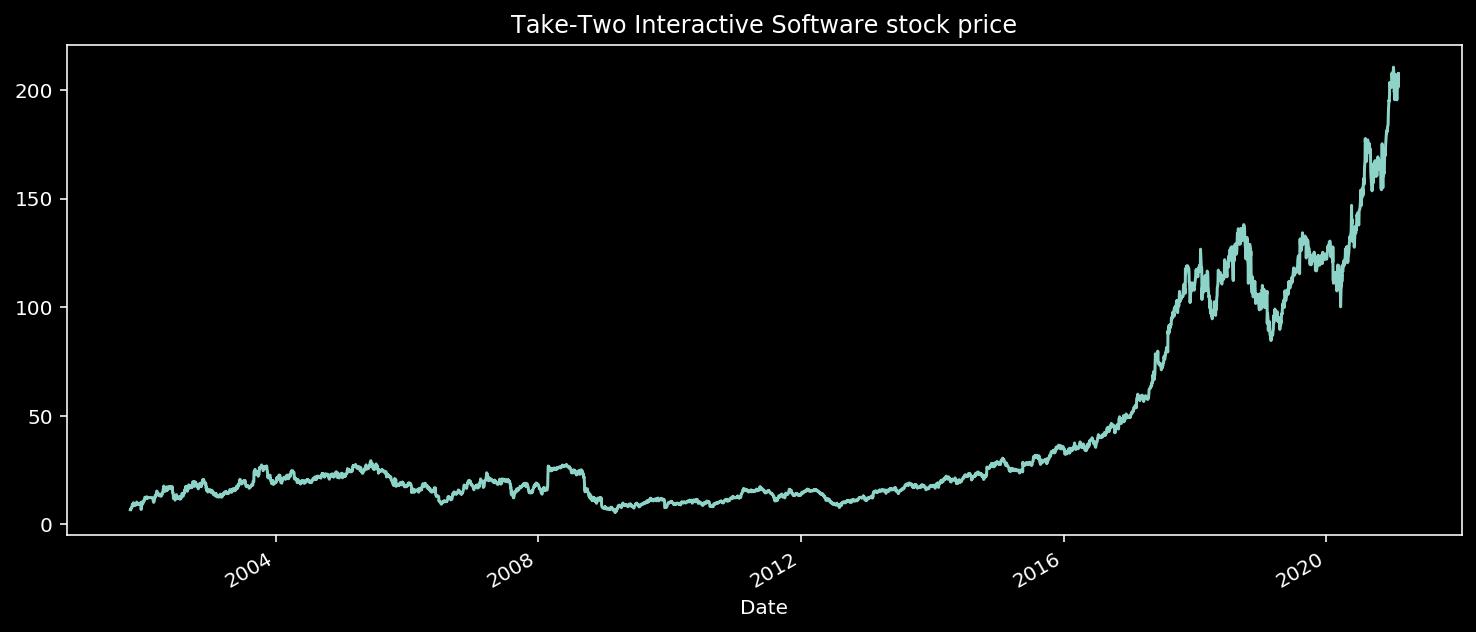

In [38]:
stk_1['Close'].plot(title="Take-Two Interactive Software stock price");

### Stock 2 -  CD Projekt S.A.

In [35]:
download_and_adjust("7CD.F")

,Open,High,Low,Close,Volume
Date,,,,,
2018-06-18,39.140225,40.754761,37.692037,40.754761,421
2018-06-19,37.936661,39.282106,37.672464,37.770313,791
2018-06-20,37.579506,37.579506,37.579506,37.579506,100
2018-06-21,38.597154,38.597154,37.183214,37.677361,68
2018-06-22,36.043252,38.646077,36.043252,36.561863,167
...,...,...,...,...,...
2021-02-01,67.320000,70.000000,65.099998,66.820000,8263
2021-02-02,67.360001,68.459999,62.680000,63.759998,23785
2021-02-03,63.520000,65.980003,63.400002,64.620003,4780


In [36]:
stk_2 = download_and_adjust("7CD.F")

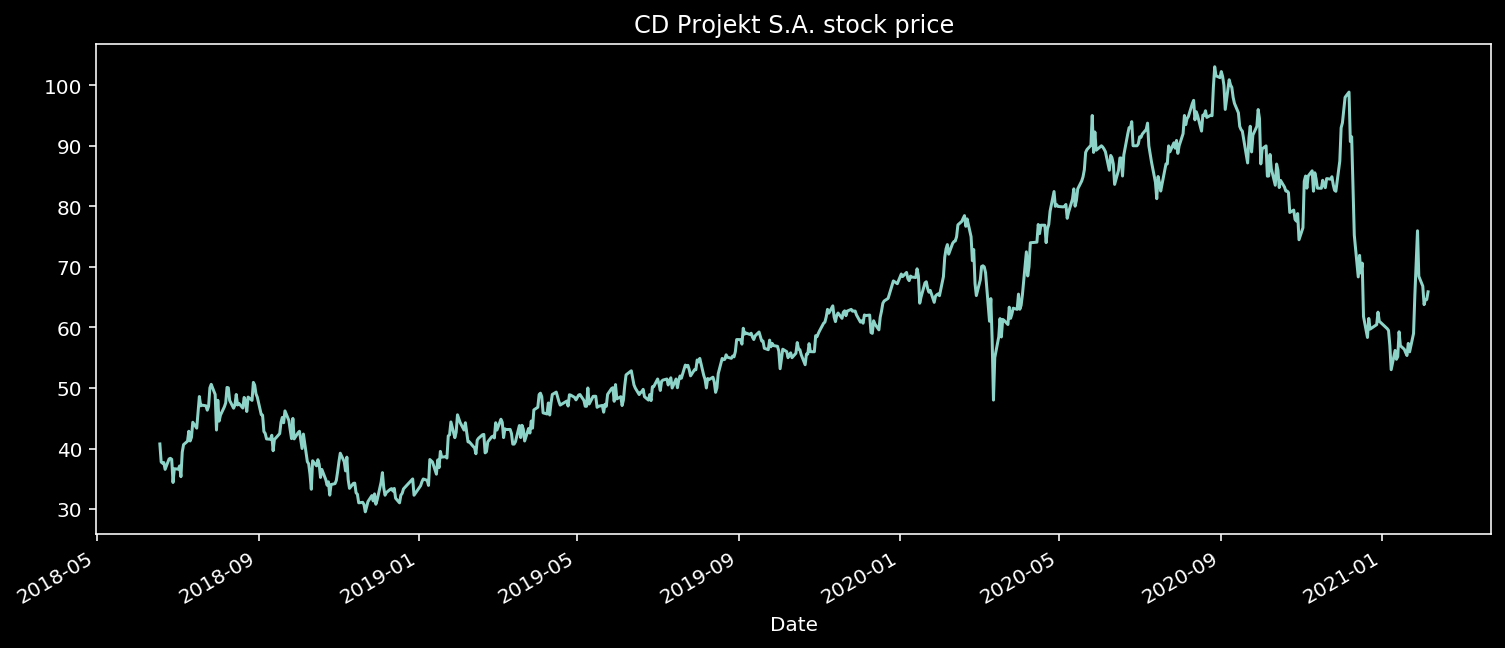

In [39]:
stk_2['Close'].plot(title="CD Projekt S.A. stock price");

### Stock 3 -  GameStop Corp.

In [58]:
download_and_adjust("GME")

,Open,High,Low,Close,Volume
Date,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200
...,...,...,...,...,...
2021-02-01,316.559998,322.000000,212.000000,225.000000,37382200
2021-02-02,140.759995,158.000000,74.220001,90.000000,78183100
2021-02-03,112.010002,113.400002,85.250000,92.410004,42698500


In [62]:
stk_3 = download_and_adjust("GME")

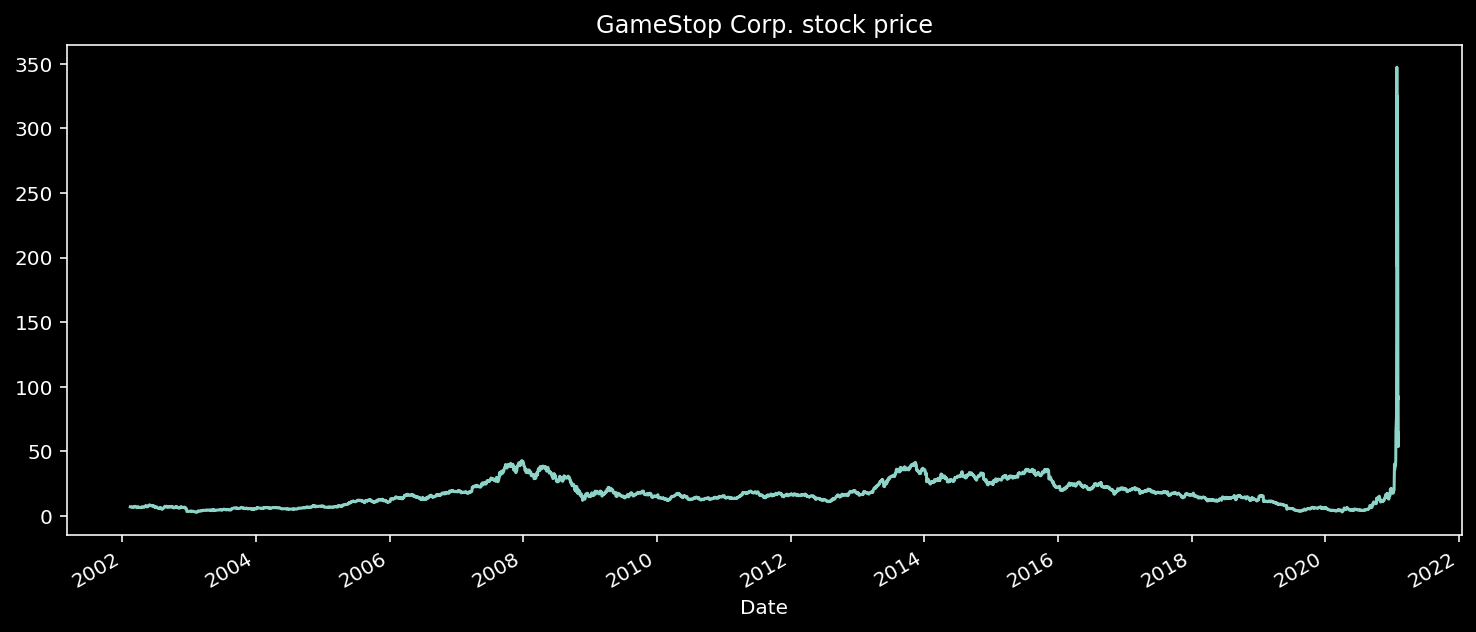

In [63]:
stk_3['Close'].plot(title="GameStop Corp. stock price");

## Saving Data 

with adjusted ohlc data

In [48]:
_portfolio_data = '../data/stock_data/'

In [49]:
def _adjust_stock_data(symbols, hdf_name):
    
    end = pd.datetime.today().date()
    start = end - 252 * BDay() * 20
    
    prices_hdf = pd.HDFStore(_portfolio_data + 'hdf/'+hdf_name+'.h5')
    
    symbol_count = len(symbols)
    N = symbol_count
    missing_symbols = []
    for i, sym in enumerate(symbols, start=1):
        if not pd.isnull(sym):
            try:
                df = yf.download(sym, start=start, end=end, progress=False)
                df.index = pd.to_datetime(df.index)
                df['adj open'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['Open'], rounding=4)
                df['adj high'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['High'], rounding=4)
                df['adj low'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['Low'], rounding=4)
                ohlc = df[['adj open', 'adj high', 'adj low', 'Adj Close', 'Volume']]
                ohlc.columns = ['Open','High','Low','Close', 'Volume']
                ohlc.to_excel(_portfolio_data+'xlsx/'+sym+'.xlsx')
                prices_hdf[clean_ticker(sym)] = ohlc
                
            except Exception as e:
                print(e, sym)
                missing_symbols.append(sym)
            N -= 1
            pct_total_left = (N / symbol_count)
            print('{}..[done] | {} of {} symbols collected | {:>.2%}'.format(\
                                                            sym, i, symbol_count, pct_total_left))
    prices_hdf.close()        
    return missing_symbols

In [64]:
symbols = ['TTWO', '7CD.F', 'GME']

adjust ohlc data and save the data in a datastore

In [65]:
_missing = _adjust_stock_data(symbols, "project_a")

TTWO..[done] | 1 of 3 symbols collected | 66.67%


/Users/mw/opt/anaconda3/lib/python3.6/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '7cdf'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


7CD.F..[done] | 2 of 3 symbols collected | 33.33%
GME..[done] | 3 of 3 symbols collected | 0.00%


check if any symbols are missing

In [66]:
_missing

[]